# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT, PER, WTR, LIQ, TDF, HANA, FCTR, KRX


In [5]:
PM.review_portfolio('WTR')

{'strategy': 'WTR', 'universe': 'UV_WTR'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR', strategy=True)

{'method_select': 'Selected',
 'method_weigh': 'Equally',
 'file': 'pf_wtr_static',
 'path': 'transaction'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [8]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [9]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [10]:
WidgetUniverse

## K200

In [11]:
k200 = PM.create_universe('UV_K200')

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded


In [12]:
k200.portfolio_data
#k200.get_names()

{'universe': {'data': {'universe': 'kospi200',
   'file': 'kospi200_prices',
   'tickers': 'KRX/INDEX/STOCK/1028',
   'daily': True,
   'path': 'data'},
  'name': 'UV_K200'}}

In [13]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

## KRX

In [14]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [17]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded


In [18]:
wtr.get_names()

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 379800: KODEX 미국S&P500TR
3) 411060: ACE KRX금현물
4) 148070: KOSEF 국고채10년
5) 284430: KODEX 200미국채혼합

In [19]:
PM.review_universe('UV_WTR')

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [20]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

In [21]:
#wtr.save()

## FCTR

In [22]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
df_prices loaded


In [23]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [24]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

## FUND

In [4]:
fund = PM.create_universe('UV_FUND')

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded


In [5]:
kw = dict(
    n_years=20, 
    close_today = WidgetUniverse.values(1),
    #tickers='selected'
)
fund.download(**kw) if WidgetUniverse.values(0) else None

In [6]:
fund.portfolio_data['universe']

{'data': {'universe': 'fund',
  'file': 'funds_prices',
  'tickers': 'funds_info',
  'daily': False,
  'path': 'data'},
 'name': 'UV_FUND'}

*create transaction_cost*

In [8]:
update = False

fd = FundDownloader.create(fund)
#fd.export_cost('TDF', 'transaction_cost', path=path_tran, update=update)
fd.export_cost('TDF')

Data for 64 funds loaded.


,universe,ticker,buy,sell,fee,tax
0,TDF,K55234DF2657,0.0,0.0,0.410,0.0
1,TDF,K55234DF2459,0.0,0.0,0.410,0.0
2,TDF,K55301DW1763,0.0,0.0,0.000,0.0
3,TDF,K55301BU6139,0.0,0.0,0.600,0.0
4,TDF,K55105BU1161,0.0,0.0,0.420,0.0
...,...,...,...,...,...,...
59,TDF,K55223BT1278,0.0,0.0,0.480,0.0
60,TDF,K55105BT9936,0.0,0.0,0.540,0.0
61,TDF,K55223BT1096,0.0,0.0,0.360,0.0
62,TDF,K55301BU6113,0.0,0.0,0.570,0.0


## LIQ

In [9]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [10]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2021-01-04 to 2024-11-28 uploaded.
df_prices loaded


In [11]:
#liq.get_names()

In [12]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

## Additional Data

### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-19 loaded


In [6]:
start = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start, **kw)

In [7]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [8]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Ratio: 2023-01-02 ~ 2024-11-19
Price: 2021-01-04 ~ 2024-12-02


# Performance

In [10]:
PM.review()

Portfolio: MMT, PER, WTR, LIQ, TDF, HANA, FCTR, KRX


In [11]:
pf_list = ['MMT', 'PER', 'WTR']
pm = PM(pf_list)

MMT:
201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded

PER:
201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded

WTR:
6 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Transaction record to 2024-11-20 loaded



In [15]:
pm.load('LIQ')
pm.load(['TDF','HANA'])

LIQ:
24 securities from 2021-01-04 to 2024-11-28 uploaded.
df_prices loaded
Transaction record to 2024-01-03 loaded

TDF:
64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Transaction record to 2024-06-19 loaded

HANA:
64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Transaction record to 2024-08-01 loaded



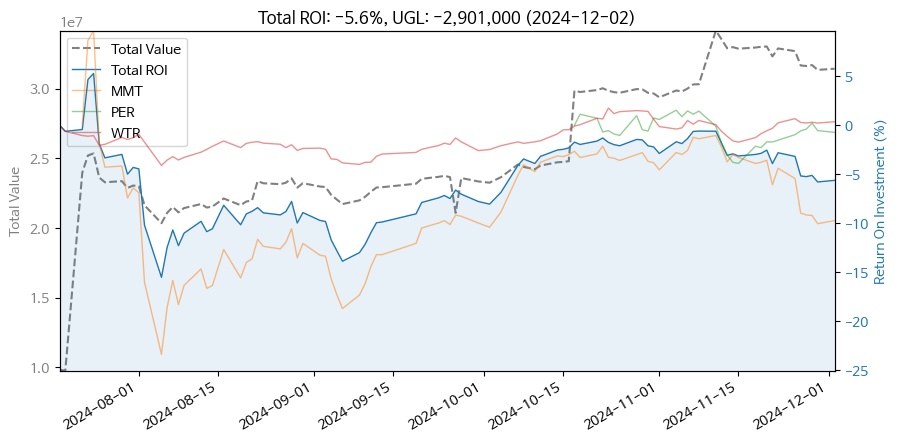

In [12]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date, roi=False)
pm.plot(start_date=start_date)

In [13]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [16]:
pm.valuate(date=w_date.value)

,MMT,PER,WTR,LIQ,TDF,HANA,Total
start,2024-07-22,2024-10-17,2024-07-18,2024-01-03,2024-06-19,2024-08-01,2024-01-03
date,2024-12-02,2024-12-02,2024-12-02,2024-11-28,2024-11-29,2024-11-29,2024-12-02
buy,29349501,12249820,10113935,6642078,10000000,9990000,78345334
sell,14322250,2621865,437755,0,0,0,17381870
value,12176419,9540458,9713594,4881044,10438108,10096676,56846299
UGL,-2850832,-87497,37414,-1761034,438108,106676,-4117165
ROI,-0.097134,-0.007143,0.003699,-0.265133,0.043811,0.010678,-0.052552


# Transaction

## MMT

In [40]:
pf_mmt = PM.create_portfolio('MMT', cost=file_cost)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [41]:
pf_mmt.portfolio_data['strategy']

{'data': {'method_select': 'Momentum',
  'method_weigh': 'Equally',
  'sort_ascending': False,
  'n_tickers': 5,
  'lookback': '1y',
  'lag': '1w',
  'file': 'pf_k200_momentum',
  'path': 'transaction'},
 'name': 'MMT'}

In [42]:
pf_mmt.view_record(-2)

name  transaction      net  weight  weight*
date       ticker                                                     
2024-10-08 267260      HD현대일렉트릭            0  2568000   0.182   0.1742
           012450     한화에어로스페이스            0  3280500   0.210   0.2225
           079550        LIG넥스원      -730500  2678500   0.192   0.1817
           003230          삼양식품            0  3144000   0.216   0.2133
           011790           SKC      3072000  3072000   0.200   0.2084
           042700         한미반도체     -2270100        0     NaN   0.0000
           489790  한화인더스트리얼솔루션즈      -354150        0     NaN   0.0000
2024-11-11 267260      HD현대일렉트릭            0  3120000   0.200   0.2119
           012450     한화에어로스페이스      -807000  2824500   0.200   0.1918
           079550        LIG넥스원            0  2926000   0.200   0.1987
           003230          삼양식품      -563000  2815000   0.200   0.1912
           064350          현대로템      3038400  3038400   0.200   0.2064
           011790           SKC     -2442900        0     NaN   0.0000

In [43]:
# run after editting record file
#_ = pf_mmt.update_record(save=True)

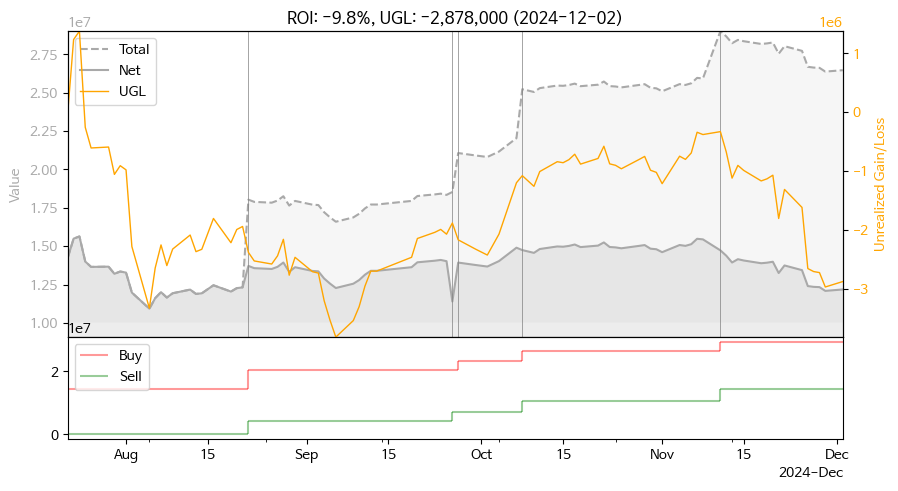

In [44]:
pf_mmt.plot(roi=False)

In [45]:
#pf_mmt.performance(metrics=METRICS)
#pf_mmt.cost
pf_mmt.valuate()

start    2024-07-22
date     2024-12-02
buy        29350569
sell       14295948
value      12176419
UGL        -2878202
ROI       -0.098063
dtype: object

In [46]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [47]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_mmt.transaction_pipeline(**kwargs_trs, **kw_liq)
pf_mmt.view_record(-2, share=True)

Liquidation set to None
5 tickers selected by Total return from 2023-11-27 to 2024-11-25
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 5 %
ROI: -8.4%, UGL: -2,671,000  (2024-12-02)
Set save=True to save transaction record


name  transaction  net  weight  weight*
date       ticker                                                 
2024-11-11 267260      HD현대일렉트릭            0    8     0.2   0.2119
           012450     한화에어로스페이스           -1    6     0.2   0.1918
           079550        LIG넥스원            0   11     0.2   0.1987
           003230          삼양식품           -1    5     0.2   0.1912
           064350          현대로템           47   47     0.2   0.2064
           011790           SKC          -20    0     NaN   0.0000
2024-12-02 267260      HD현대일렉트릭           -1    7     0.2   0.2038
           012450     한화에어로스페이스            0    7     0.2   0.1952
           079550        LIG넥스원            0   12     0.2   0.2059
           000150            두산           11   12     0.2   0.2032
           003230          삼양식품           -1    4     0.2   0.1919
           010120   LS ELECTRIC            0    0     0.0   0.0000
           011790           SKC            0    0     0.0   0.0000
           042700         한미반도체            0    0     0.0   0.0000
           064350          현대로템          -47    0     0.0   0.0000
           489790  한화인더스트리얼솔루션즈            0    0     0.0   0.0000

### Copy record to edit

In [11]:
date = '2024-09-27'
save = False

pf_mmt.copy_record(date, save=save)

Transaction record to 2024-09-27 loaded
ERROR: check the date as no new transaction


### Update record

In [ ]:
pf_mmt.update_record()

## KRX
*simulation*

In [16]:
pf_krx = PM.create_portfolio('KRX')

2712 assets from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded
ERROR from get_names: '287410'
Transaction record to 2024-10-02 loaded


In [17]:
pf_krx.view_record(-2)

name   price  transaction   net  weight  weight*
date       asset                                                     
2024-08-01 078860  엔에스이엔엠   10080         -217   109     0.2   0.2056
           016670     디모아    7070          156   156     0.2   0.2064
           159910   스킨앤스킨    1070         1034  1034     0.2   0.2070
           089030     테크윙   51400           21    21     0.2   0.2020
           196170    알테오젠  319000            3     3     0.2   0.1791
           042700   한미반도체  127300          -10     0     NaN   0.0000
           065350  신성델타테크   53800          -21     0     NaN   0.0000
           066790    씨씨에스    2850         -505     0     NaN   0.0000
           139050    BF랩스    2805         -530     0     NaN   0.0000
2024-10-02 078860  엔에스이엔엠    9700           30   139     0.2   0.2000
           016670     디모아    4725          130   286     0.2   0.2004
           033790      피노    9090          148   148     0.2   0.1995
           159910   스킨앤스킨     761          744  1778     0.2   0.2007
           196170    알테오젠  336000            1     4     0.2   0.1993
           089030     테크윙   36500          -21     0     NaN   0.0000

ROI -12.86%, Unrealized G/L -4,042,804 on 2024-10-08


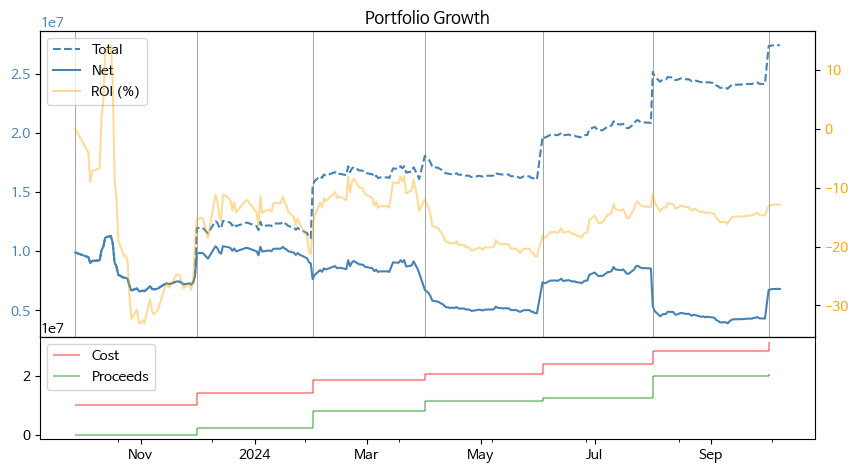

In [18]:
pf_krx.valuate()

In [19]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [20]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 assets selected by Total return from 2023-09-08 to 2024-09-06
Weights of assets determined by Equal weights.
Mean absolute error of weights: 4 %
ROI -12.80%, Unrealized G/L -4,042,804 on 2024-10-08
Set save=True to save transaction record


name   price  transaction   net weight weight*
date       asset                                                   
2024-10-02 078860  엔에스이엔엠    9700           30   139    0.2     0.2
           016670     디모아    4725          130   286    0.2  0.2004
           033790      피노    9090          148   148    0.2  0.1995
           159910   스킨앤스킨     761          744  1778    0.2  0.2007
           196170    알테오젠  336000            1     4    0.2  0.1993
           089030     테크윙   36500          -21     0    NaN     0.0
2024-10-08 078860    None    9390            6   145  0.200  0.2079
           016670    None    4865           -6   280  0.200  0.2080
           033790    None    9040            2   150  0.200  0.2070
           196170    None  369000           -1     3  0.200  0.1690
           159910    None     734           79  1857  0.200  0.2081

## PER

In [14]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-19 loaded


In [19]:
pf_per = PM.create_portfolio('PER', df_additional=df_ratio, **kw_cost)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [16]:
#pf_per.portfolio_data

In [17]:
pf_per.view_record(-2)

name   price  transaction  net  weight  weight*
date       ticker                                                    
2024-10-17 010060   OCI홀딩스   66700           14   14    0.20   0.1892
           003030   세아제강지주  164450            6    6    0.20   0.1999
           009970  영원무역홀딩스   89000           11   11    0.20   0.1983
           016380     KG스틸    6600          154  154    0.20   0.2059
           047040     대우건설    3820          267  267    0.20   0.2066
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05   0.0497
           003030   세아제강지주  193300           -4    2    0.05   0.0402
           009970  영원무역홀딩스   85700           -6    5    0.05   0.0446
           016380     KG스틸    6590          -78   76    0.05   0.0521
           047040     대우건설    3635         -127  140    0.05   0.0529
           088350     한화생명    2865          180  180    0.05   0.0536
           078930       GS   41600           12   12    0.05   0.0519
           111770     영원무역   40150           12   12    0.05   0.0501
           139130  DGB금융지주    8250           63   63    0.05   0.0540
           005830   DB손해보험  106900            4    4    0.05   0.0445
           001450     현대해상   29750           17   17    0.05   0.0526
           009900     명신산업   13770           36   36    0.05   0.0515
           241560     두산밥캣   40000           13   13    0.05   0.0541
           000270       기아   93600            5    5    0.05   0.0487
           024110     기업은행   14570           35   35    0.05   0.0530
           005850      에스엘   31350           16   16    0.05   0.0522
           316140   우리금융지주   16080           32   32    0.05   0.0535
           138930  BNK금융지주    9430           55   55    0.05   0.0539
           005380      현대차  209500            2    2    0.05   0.0436
           017800   현대엘리베이   46300            9    9    0.05   0.0433

In [20]:
pf_per.valuate()

start    2024-10-17
date     2024-12-02
buy        12250265
sell        2617050
value       9603980
UGL          -29235
ROI       -0.002386
dtype: object

In [37]:
#pf_per.update_record()
#pf_per.view_record(-2)

Transaction dates updated for profit/loss on the dates


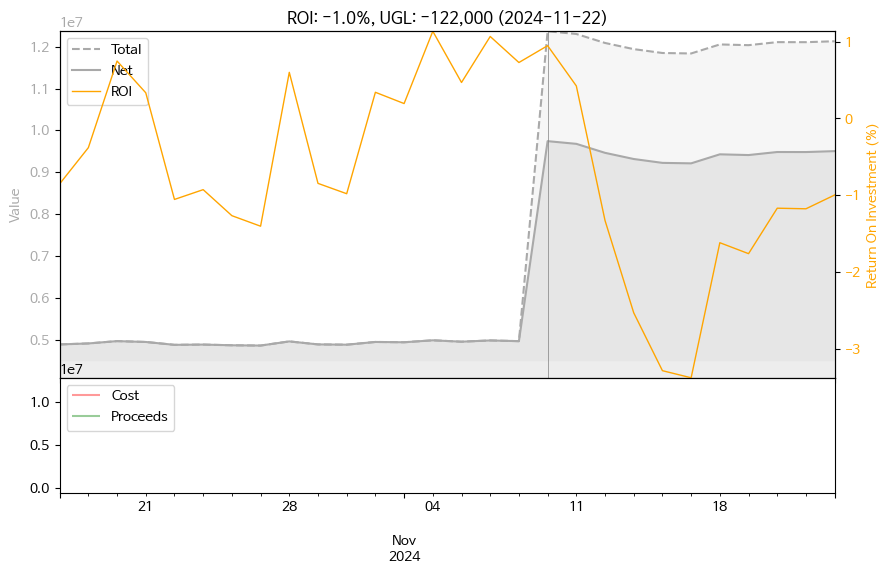

In [38]:
pf_per.plot()

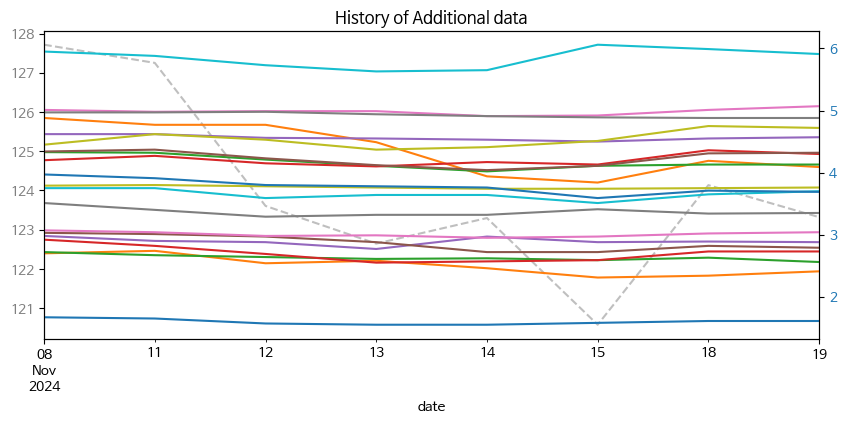

In [39]:
_ = pf_per.check_additional(plot=True, figsize=(10,4), legend=False)

In [40]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [41]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_per.transaction_pipeline(**kwargs_trs)
pf_per.view_record(-1)

Liquidation set to None
ERROR: no ratio for "['2024-11-20', '2024-11-21', '2024-11-22'] not in index"


name   price  transaction  net  weight  weight*
date       ticker                                                    
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05   0.0497
           003030   세아제강지주  193300           -4    2    0.05   0.0402
           009970  영원무역홀딩스   85700           -6    5    0.05   0.0446
           016380     KG스틸    6590          -78   76    0.05   0.0521
           047040     대우건설    3635         -127  140    0.05   0.0529
           088350     한화생명    2865          180  180    0.05   0.0536
           078930       GS   41600           12   12    0.05   0.0519
           111770     영원무역   40150           12   12    0.05   0.0501
           139130  DGB금융지주    8250           63   63    0.05   0.0540
           005830   DB손해보험  106900            4    4    0.05   0.0445
           001450     현대해상   29750           17   17    0.05   0.0526
           009900     명신산업   13770           36   36    0.05   0.0515
           241560     두산밥캣   40000           13   13    0.05   0.0541
           000270       기아   93600            5    5    0.05   0.0487
           024110     기업은행   14570           35   35    0.05   0.0530
           005850      에스엘   31350           16   16    0.05   0.0522
           316140   우리금융지주   16080           32   32    0.05   0.0535
           138930  BNK금융지주    9430           55   55    0.05   0.0539
           005380      현대차  209500            2    2    0.05   0.0436
           017800   현대엘리베이   46300            9    9    0.05   0.0433

In [42]:
#pf_per.update_record()

## WTR
*modified all weather*

In [21]:
pf_wtr = PM.create_portfolio('WTR', **kw_cost)

6 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-20 loaded


In [22]:
pf_wtr.portfolio_data['strategy']

{'data': {'method_select': 'Selected',
  'method_weigh': 'Equally',
  'file': 'pf_wtr_static',
  'path': 'transaction'},
 'name': 'WTR'}

Transaction dates updated for profit/loss on the dates


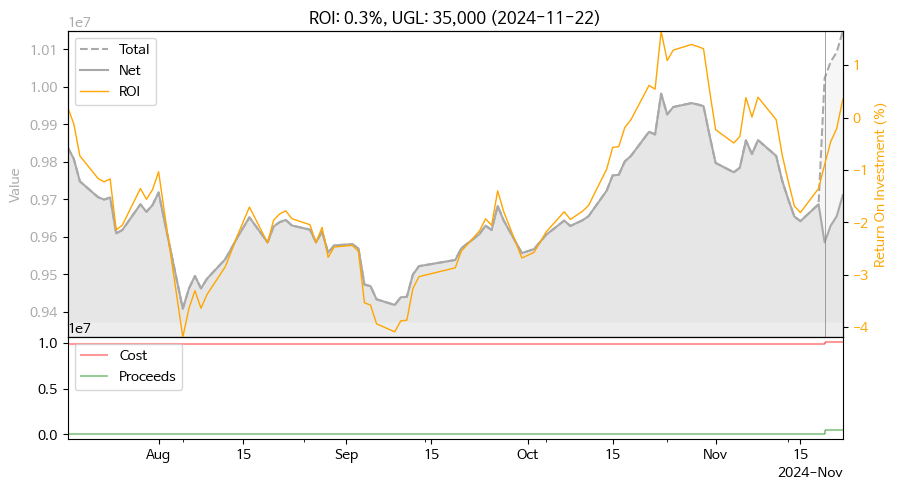

In [5]:
pf_wtr.plot()

In [6]:
pf_wtr.view_record(-2)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-07-18 069500             KODEX 200   39085           42   42   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14   0.167   
           148070          KOSEF 국고채10년  114910           14   14   0.167   
           379800      KODEX 미국S&P500TR   17625           94   94   0.167   
           411060            ACE KRX금현물   15715          106  106   0.167   
           284430        KODEX 200미국채혼합   13440          124  124   0.167   
2024-11-20 069500             KODEX 200   33010            7   49   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114735            0   14   0.167   
           148070          KOSEF 국고채10년  117035           -1   13   0.167   
           379800      KODEX 미국S&P500TR   18790           -8   86   0.167   
           411060            ACE KRX금현물   17040          -10   96   0.167   
           284430        KODEX 200미국채혼합   12585            5  129   0.167   

                   weight*  
date       ticker           
2024-07-18 069500   0.1670  
           273130   0.1610  
           148070   0.1640  
           379800   0.1690  
           411060   0.1700  
           284430   0.1700  
2024-11-20 069500   0.1684  
           273130   0.1676  
           148070   0.1584  
           379800   0.1680  
           411060   0.1685  
           284430   0.1691

In [7]:
#pf_wtr.performance(metrics=METRICS)

In [8]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [9]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2)

Liquidation set to None
6 tickers selected by All from 2024-05-22 to 2024-11-22
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
Transaction dates updated for profit/loss on the dates
ROI: 0.3%, UGL: 35,000  (2024-11-22)
Set save=True to save transaction record


name   price  transaction  net weight  \
date       ticker                                                          
2024-11-20 069500             KODEX 200   33010            7   49  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114735            0   14  0.167   
           148070          KOSEF 국고채10년  117035           -1   13  0.167   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.167   
           411060            ACE KRX금현물   17040          -10   96  0.167   
           284430        KODEX 200미국채혼합   12585            5  129  0.167   
2024-11-22 069500             KODEX 200   33345           -1   48  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  115170            0   14  0.167   
           379800      KODEX 미국S&P500TR   19030           -1   85  0.167   
           411060            ACE KRX금현물   17350           -3   93  0.167   
           148070          KOSEF 국고채10년  117420            0   13  0.167   
           284430        KODEX 200미국채혼합   12685           -2  127  0.167   

                  weight*  
date       ticker          
2024-11-20 069500  0.1684  
           273130  0.1676  
           148070  0.1584  
           379800   0.168  
           411060  0.1685  
           284430  0.1691  
2024-11-22 069500  0.1670  
           273130  0.1683  
           379800  0.1688  
           411060  0.1684  
           148070  0.1593  
           284430  0.1681

## LIQ

In [49]:
pf_liq = PM.create_portfolio('LIQ')

24 securities from 2021-01-04 to 2024-11-22 uploaded.
df_prices loaded
Transaction record to 2024-01-03 loaded


Transaction dates updated for profit/loss on the dates


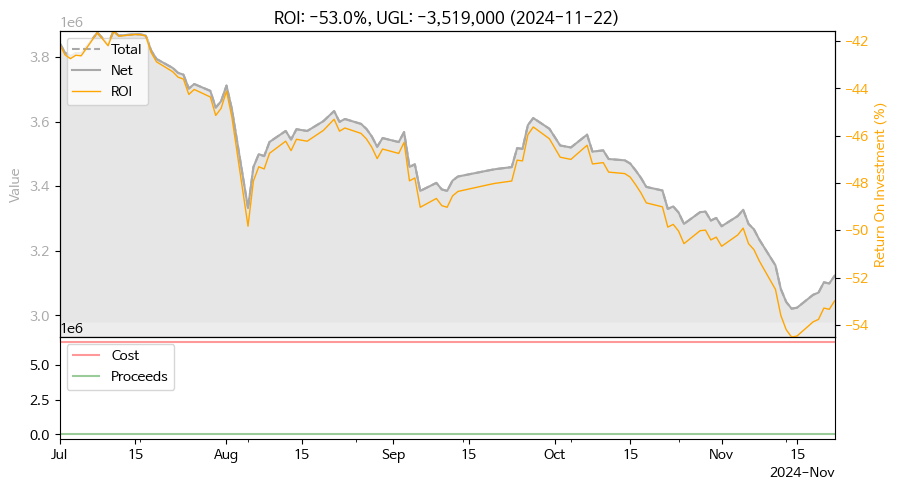

In [50]:
#date=None
date='2024-07-01'
pf_liq.plot(start_date=date)

In [51]:
pf_liq.view_record()

name   price  transaction  net  weight  weight*
date       ticker                                                    
2024-01-03 011780     금호석유  171000            2    2     NaN   0.0515
           066570     LG전자  122500            2    2     NaN   0.0369
           035890     서희건설    1800          166  166     NaN   0.0450
           040420  정상제이엘에스    7970           37   37     NaN   0.0444
           140520     대창스틸    3250           90   90     NaN   0.0440
           072990    에이치시티   15900           18   18     NaN   0.0431
           091580    상신이디피   16800           18   18     NaN   0.0455
           011200      HMM   26350           11   11     NaN   0.0436
           002220     한일철강    3130           95   95     NaN   0.0448
           006650     대한유화  181500            1    1     NaN   0.0273
           136490       선진   12700           23   23     NaN   0.0440
           064550    바이오니아   49650            6    6     NaN   0.0449
           460860     동국제강   18723            8    8     NaN   0.0226
           040910     아이씨디   12200           24   24     NaN   0.0441
           024950   삼천리자전거    9770           30   30     NaN   0.0441
           900070   글로벌에스엠    1080          277  277     NaN   0.0450
           036580      팜스코    6090           49   49     NaN   0.0449
           184230  SGA솔루션즈    1315          228  228     NaN   0.0451
           460850     동국씨엠   18055            5    5     NaN   0.0136
           016250  SGC E&C   46000            6    6     NaN   0.0416
           001230    동국홀딩스   24044            2    2     NaN   0.0072
           049470      SGA    1115          269  269     NaN   0.0452
           217820    원익피앤이   12518           22   22     NaN   0.0415
           109960   AP헬스케어    3790          158  158     NaN   0.0902

## TDF

In [19]:
selected = ['K55301BU6139', 'K55206C95800']

In [20]:
pf_tdf = PM.create_portfolio('TDF', tickers=selected, cost=file_cost)
pf_tdf.view_record()

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-06-19 loaded


name  \
date       ticker                                                    
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   

                         transaction      net  weight  weight*  
date       ticker                                               
2024-06-19 K55301BU6139      5000000  5000000     0.5      0.5  
           K55206C95800      5000000  5000000     0.5      0.5

In [14]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

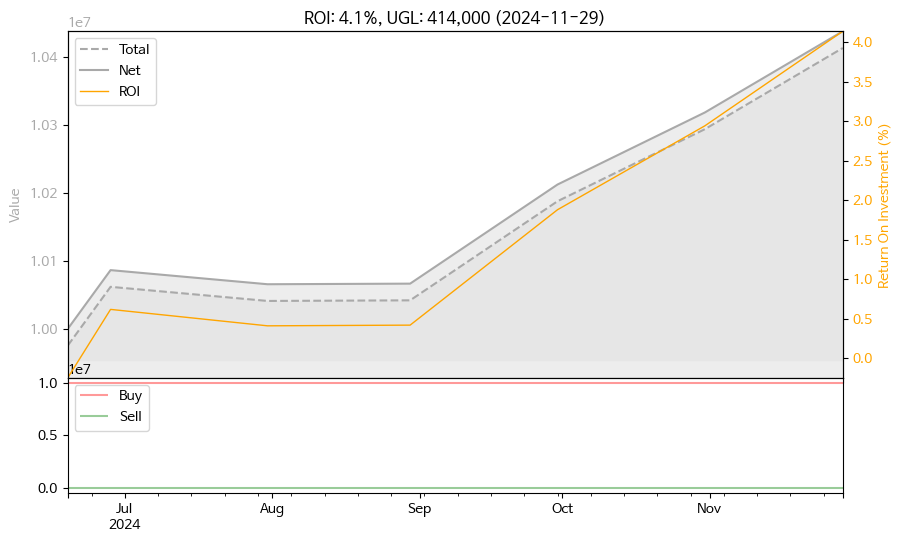

In [21]:
pf_tdf.plot()

In [22]:
pf_tdf.valuate()

start    2024-06-19
date     2024-11-29
buy        10000000
sell         -24592
value      10438108
UGL          413516
ROI        0.041352
dtype: object

In [23]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [26]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record()

Liquidation set to None
2 tickers selected by Selected from 2024-11-29 to 2024-11-29
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 4.1%, UGL: 414,000  (2024-11-29)
Set save=True to save transaction record


name  \
date       ticker                                                    
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   
2024-11-29 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   

                         transaction      net  weight  weight*  
date       ticker                                               
2024-06-19 K55301BU6139      5000000  5000000     0.5      0.5  
           K55206C95800      5000000  5000000     0.5      0.5  
2024-11-29 K55301BU6139        51572  5218429     0.5      0.5  
           K55206C95800       -53146  5218104     0.5      0.5

## HANA

In [31]:
selected = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']

In [33]:
pf_hana = PM.create_portfolio('HANA', tickers=selected, cost=file_cost)
pf_hana.view_record()

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-08-01 loaded


name  transaction  \
date       ticker                                                             
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      5020000   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      2420000   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1860000   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce       690000   

                             net  weight  weight*  
date       ticker                                  
2024-08-01 KR5101888398  5020000   0.502   0.5026  
           KR5236AS4826  2420000   0.242   0.2422  
           KR5370AP9956  1860000   0.186   0.1862  
           K55306CV9946   690000   0.069   0.0690

In [34]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

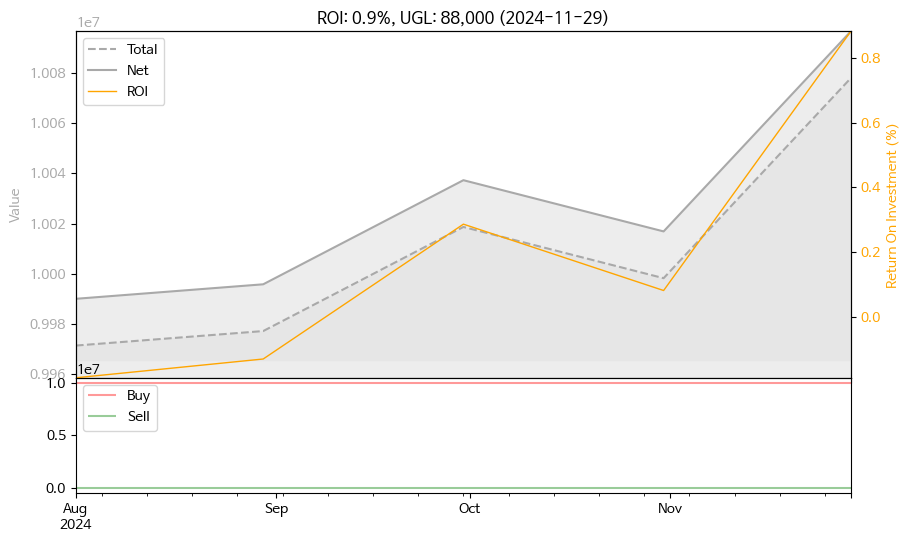

In [35]:
pf_hana.plot()

In [36]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [37]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

Liquidation set to None
4 tickers selected by Selected from 2022-11-29 to 2024-11-29
Weights of tickers determined by Inv.Vol.
Mean absolute error of weights: 0 %
ROI: 0.8%, UGL: 88,000  (2024-11-29)
Set save=True to save transaction record


name  transaction  \
date       ticker                                                             
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      5020000   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      2420000   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1860000   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce       690000   
2024-11-29 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)       566118   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      -232494   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      -332582   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce        -2966   

                             net  weight  weight*  
date       ticker                                  
2024-08-01 KR5101888398  5020000  0.5020   0.5026  
           KR5236AS4826  2420000  0.2420   0.2422  
           KR5370AP9956  1860000  0.1860   0.1862  
           K55306CV9946   690000  0.0690   0.0690  
2024-11-29 KR5101888398  5686663  0.5633   0.5633  
           KR5236AS4826  2158336  0.2138   0.2138  
           KR5370AP9956  1575484  0.1561   0.1561  
           K55306CV9946   674266  0.0668   0.0668

# testing

# testing

In [8]:
from pf_utils import CostManager

pf_mmt = PM.create_portfolio('MMT', **kw_cost)
df_rec = pf_mmt.view_record(value=True)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [16]:
from pf_utils import CostManager

pf_mmt = PM.create_portfolio('TDF', **kw_cost)
df_rec = pf_mmt.view_record(value=True)

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-06-19 loaded


In [20]:
from pf_utils import PortfolioBuilder

df = _calc_record_value(pf_mmt, pf_mmt.record, pf_mmt.df_universe)
pf_mmt.record.join(df)

name  transaction      net  weight  weight*  \
date       ticker                                                        
2024-07-22 003230          삼양식품      3185000  3185000   0.227   0.2234   
           267260      HD현대일렉트릭      2826000  2826000   0.198   0.1982   
           042700         한미반도체      2980000  2980000   0.205   0.2090   
           000150            두산      2600000  2600000   0.189   0.1824   
           010120   LS ELECTRIC      2664000  2664000   0.181   0.1869   
2024-08-22 267260      HD현대일렉트릭      -318000  2544000   0.192   0.1856   
           003230          삼양식품       509000  3054000   0.217   0.2228   
           012450     한화에어로스페이스      2825000  2825000   0.206   0.2061   
           079550        LIG넥스원      2702000  2702000   0.199   0.1971   
           042700         한미반도체       123100  2585100   0.186   0.1886   
           000150            두산     -1918800        0   0.000   0.0000   
           010120   LS ELECTRIC     -2092800        0   0.000   0.0000   
2024-09-26 267260      HD현대일렉트릭            0  2680000     NaN   0.2353   
           003230          삼양식품            0  3288000     NaN   0.2887   
           012450     한화에어로스페이스     -2825000        0     NaN   0.0000   
           079550        LIG넥스원            0  3024000     NaN   0.2655   
           042700         한미반도체            0  2398200     NaN   0.2105   
2024-09-27 267260      HD현대일렉트릭            0  2556000     NaN   0.1835   
           003230          삼양식품            0  3228000     NaN   0.2317   
           079550        LIG넥스원            0  2947000     NaN   0.2116   
           042700         한미반도체            0  2373000     NaN   0.1704   
           012450     한화에어로스페이스      2543292  2543292     NaN   0.1826   
           489790  한화인더스트리얼솔루션즈       281709   281709     NaN   0.0202   
2024-10-08 267260      HD현대일렉트릭            0  2568000   0.182   0.1742   
           012450     한화에어로스페이스            0  3280500   0.210   0.2225   
           079550        LIG넥스원      -730500  2678500   0.192   0.1817   
           003230          삼양식품            0  3144000   0.216   0.2133   
           011790           SKC      3072000  3072000   0.200   0.2084   
           042700         한미반도체     -2270100        0     NaN   0.0000   
           489790  한화인더스트리얼솔루션즈      -354150        0     NaN   0.0000   
2024-11-11 267260      HD현대일렉트릭            0  3120000   0.200   0.2119   
           012450     한화에어로스페이스      -807000  2824500   0.200   0.1918   
           079550        LIG넥스원            0  2926000   0.200   0.1987   
           003230          삼양식품      -563000  2815000   0.200   0.1912   
           064350          현대로템      3038400  3038400   0.200   0.2064   
           011790           SKC     -2442900        0     NaN   0.0000   

                         end         value  
date       ticker                           
2024-07-22 003230 2024-08-22  2.546995e+06  
           267260 2024-08-22  3.023051e+06  
           042700 2024-08-22  2.473769e+06  
           000150 2024-08-22  1.970386e+06  
           010120 2024-08-22  2.080110e+06  
2024-08-22 267260 2024-09-26  2.709825e+06  
           003230 2024-09-26  3.300970e+06  
           012450 2024-09-26  2.946945e+06  
           079550 2024-09-26  3.076605e+06  
           042700 2024-09-26  2.445886e+06  
           000150 2024-11-11  0.000000e+00  
           010120 2024-11-11  0.000000e+00  
2024-09-26 267260 2024-09-27  2.556000e+06  
           003230 2024-09-27  3.228000e+06  
           012450 2024-09-27  0.000000e+00  
           079550 2024-09-27  2.947000e+06  
           042700 2024-09-27  2.373000e+06  
2024-09-27 267260 2024-10-08  2.568000e+06  
           003230 2024-10-08  3.144000e+06  
           079550 2024-10-08  3.423000e+06  
           042700 2024-10-08  2.255400e+06  
           012450 2024-10-08  2.924385e+06  
           489790 2024-10-08  3.242837e+05  
2024-10-08 267260 2024-11-11  3.120000e+06  
           012450 2024-11-11  3.744000e+06  

In [21]:
def _calc_record_value(self, df_rec, df_prices, date=None, msg=False):
    """
    get record of transactions with values by asset
    """
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_tkr = cols_record['tkr']
    col_net = cols_record['net']
    col_val = 'value'
    col_prc = 'price'
    col_stt = 'start'
    col_end = 'end'

    sr_net = df_rec[col_net]
    date = sr_net.index.get_level_values(col_date).max() if date is None else date
    
    df_val = PortfolioBuilder.calc_shares(sr_net, df_prices, cols_record, int_share=False)
    df_val = df_val.to_frame(col_val)
    df_val[col_stt] = df_val.index.get_level_values(col_date)
    df_val[col_end] = (df_val.groupby(col_tkr, group_keys=False)
                      .apply(lambda x: x[col_stt].shift(-1)).fillna(date))

    idx = [col_tkr, col_end]
    df = df_prices.stack().swaplevel().sort_index().rename(col_prc).rename_axis(idx)
    df_val[col_val] = df_val.join(df, on=idx).apply(lambda x: x[col_val] * x[col_prc], axis=1)
    return df_val.loc[:, [col_end, col_val]]


In [11]:
def _calc_fee_annual(df_rec, cols_record, sr_fee, date, name='fee', method_sell=False):
    """
    calc annual fee
    sr_fee: dict or series of ticker to annual fee. rate
    method_sell: True if fee calculated when selling (end date)
    """
    col_tkr = cols_record['tkr']
    col_net = cols_record['net']
    col_date = cols_record['date']

    cols = ['end', 'value']
    if pd.Index(cols).difference(df_rec.columns).size > 0:
        return print('ERROR')
    else:
        df_val = df_rec[cols]
        df_val['period'] = df_rec['end'].sub(df_rec.index.get_level_values('date')).dt.days
    
    if isinstance(sr_fee, dict):
        sr_fee = pd.Series(sr_fee)
    elif isinstance(sr_fee, Number):
        sr_fee = pd.Series(sr_fee, index=df_rec.index.get_level_values(col_tkr).unique())
    sr_fee = sr_fee.rename_axis(col_tkr).rename(name)

    if method_sell:
        df_val = (df_val.reset_index(col_date, drop=True)
                  .rename(columns={'end':col_date}).set_index(col_date, append=True))
    
    df_val = df_val.loc[df_val['value'] > 0]
    
    df_val['rate'] = (df_val.join(sr_fee)
                      .apply(lambda x: -1 + (1 + x[name]) ** (x['period']/365), axis=1)
                      .fillna(0)) # fillna for missing tickers in sr_fee
    return (df_val.apply(lambda x: x['value'] * x['rate'], axis=1)
            .rename(name).swaplevel().sort_index())

In [ ]:
import pandas as pd
from numbers import Number

cols_record = pf_mmt.cols_record
date = '2024-11-29'
#sr_fee = pd.Series(pf_mmt.cost['fee']) / 100
sr_fee = pf_mmt.cost['fee'] / 100
CostManager._calc_fee_annual(df_rec, cols_record, sr_fee, date, name='fee', method_sell=False)

In [19]:
col_tkr = cols_record['tkr']
col_net = cols_record['net']
col_date = cols_record['date']

cols = ['end', 'value']
if pd.Index(cols).difference(df_rec.columns).size > 0:
    print('ERROR')
else:
    df_val = df_rec[cols]
    df_val = df_val.join(df_rec['end'].sub(df_rec.index.get_level_values('date')).dt.days.rename('period'))

In [20]:
df_val

end         value  period
date       ticker                                 
2024-07-22 003230 2024-08-22  2.546995e+06      31
           267260 2024-08-22  3.023051e+06      31
           042700 2024-08-22  2.473769e+06      31
           000150 2024-08-22  1.970386e+06      31
           010120 2024-08-22  2.080110e+06      31
2024-08-22 267260 2024-09-26  2.709825e+06      35
           003230 2024-09-26  3.300970e+06      35
           012450 2024-09-26  2.946945e+06      35
           079550 2024-09-26  3.076605e+06      35
           042700 2024-09-26  2.445886e+06      35
           000150 2024-11-11  0.000000e+00      81
           010120 2024-11-11  0.000000e+00      81
2024-09-26 267260 2024-09-27  2.556000e+06       1
           003230 2024-09-27  3.228000e+06       1
           012450 2024-09-27  0.000000e+00       1
           079550 2024-09-27  2.947000e+06       1
           042700 2024-09-27  2.373000e+06       1
2024-09-27 267260 2024-10-08  2.568000e+06      11
           003230 2024-10-08  3.144000e+06      11
           079550 2024-10-08  3.423000e+06      11
           042700 2024-10-08  2.255400e+06      11
           012450 2024-10-08  2.924385e+06      11
           489790 2024-10-08  3.242837e+05      11
2024-10-08 267260 2024-11-11  3.120000e+06      34
           012450 2024-11-11  3.744000e+06      34
           079550 2024-11-11  2.914033e+06      34
           003230 2024-11-11  3.372000e+06      34
           011790 2024-11-11  2.428837e+06      34
           042700 2024-11-11  0.000000e+00      34
           489790 2024-11-11  0.000000e+00      34
2024-11-11 267260 2024-11-11  3.120000e+06       0
           012450 2024-11-11  2.824500e+06       0
           079550 2024-11-11  2.926000e+06       0
           003230 2024-11-11  2.815000e+06       0
           064350 2024-11-11  3.038400e+06       0
           011790 2024-11-11  0.000000e+00       0

In [ ]:
df_rec[cols]

end         value
date       ticker                         
2024-07-22 003230 2024-08-22  2.546995e+06
           267260 2024-08-22  3.023051e+06
           042700 2024-08-22  2.473769e+06
           000150 2024-08-22  1.970386e+06
           010120 2024-08-22  2.080110e+06
2024-08-22 267260 2024-09-26  2.709825e+06
           003230 2024-09-26  3.300970e+06
           012450 2024-09-26  2.946945e+06
           079550 2024-09-26  3.076605e+06
           042700 2024-09-26  2.445886e+06
           000150 2024-11-11  0.000000e+00
           010120 2024-11-11  0.000000e+00
2024-09-26 267260 2024-09-27  2.556000e+06
           003230 2024-09-27  3.228000e+06
           012450 2024-09-27  0.000000e+00
           079550 2024-09-27  2.947000e+06
           042700 2024-09-27  2.373000e+06
2024-09-27 267260 2024-10-08  2.568000e+06
           003230 2024-10-08  3.144000e+06
           079550 2024-10-08  3.423000e+06
           042700 2024-10-08  2.255400e+06
           012450 2024-10-08  2.924385e+06
           489790 2024-10-08  3.242837e+05
2024-10-08 267260 2024-11-11  3.120000e+06
           012450 2024-11-11  3.744000e+06
           079550 2024-11-11  2.914033e+06
           003230 2024-11-11  3.372000e+06
           011790 2024-11-11  2.428837e+06
           042700 2024-11-11  0.000000e+00
           489790 2024-11-11  0.000000e+00
2024-11-11 267260 2024-11-11  3.120000e+06
           012450 2024-11-11  2.824500e+06
           079550 2024-11-11  2.926000e+06
           003230 2024-11-11  2.815000e+06
           064350 2024-11-11  3.038400e+06
           011790 2024-11-11  0.000000e+00

# testing

In [14]:
path_data = 'data'
path_tran = 'transaction'
path_tran_old = 'transaction/del2'

In [28]:
def view_record_by_asset(self, df_net, df_price, date, cols_record):
    col_date = cols_record['date']
    col_net = cols_record['net']
    col_tkr = cols_record['tkr']
    col_prc = 'price'
    col_end = 'end'
    
    df_net = PortfolioBuilder.calc_shares(df_net, df_price, cols_record, int_share=False)
    df_net = df_net.swaplevel().sort_index().to_frame(col_net)

    df_net['start'] = df_net.index.get_level_values(col_date)
    df_net['end'] = (df_net.groupby(col_tkr, group_keys=False)
                     .apply(lambda x: x['start'].shift(-1)).fillna(date))

    idx = ['ticker', 'end']
    df = df_price.stack().swaplevel().sort_index().rename(col_prc).rename_axis(idx)
    df_net[col_net] = df_net.join(df, on=idx).apply(lambda x: x[col_net] * x[col_prc], axis=1)
    return df_net[['end', 'net']]

In [35]:
def view_record_by_asset(self, df_net, df_price, date, cols_record):
    col_date = cols_record['date']
    col_net = cols_record['net']
    col_tkr = cols_record['tkr']
    col_prc = 'price'
    col_stt = 'start'
    col_end = 'end'
    
    df_net = PortfolioBuilder.calc_shares(df_net, df_price, cols_record, int_share=False)
    df_net = df_net.swaplevel().sort_index().to_frame(col_net)

    df_net[col_stt] = df_net.index.get_level_values(col_date)
    df_net[col_end] = (df_net.groupby(col_tkr, group_keys=False)
                     .apply(lambda x: x[col_stt].shift(-1)).fillna(date))

    idx = [col_tkr, col_end]
    df = df_price.stack().swaplevel().sort_index().rename(col_prc).rename_axis(idx)
    df_net[col_net] = df_net.join(df, on=idx).apply(lambda x: x[col_net] * x[col_prc], axis=1)
    return df_net.rename_axis([col_tkr, col_stt]).loc[df_net[col_net]>0].loc[:, [col_end, col_net]]

In [138]:
def view_record_by_asset(self, sr_net, df_price, date, cols_record):
    col_date = cols_record['date']
    col_tkr = cols_record['tkr']
    col_buy = 'buy'
    col_val = 'value'
    col_prc = 'price'
    col_stt = 'start'
    col_end = 'end'

    df_rec = sr_net.to_frame(col_buy)
    df_rec[col_val] = PortfolioBuilder.calc_shares(sr_net, df_price, cols_record, int_share=False)
    df_rec = df_rec.swaplevel().sort_index()
    df_rec[col_stt] = df_rec.index.get_level_values(col_date)
    df_rec[col_end] = (df_rec.groupby(col_tkr, group_keys=False)
                     .apply(lambda x: x[col_stt].shift(-1)).fillna(date))

    idx = [col_tkr, col_end]
    df = df_price.stack().swaplevel().sort_index().rename(col_prc).rename_axis(idx)
    df_rec[col_val] = df_rec.join(df, on=idx).apply(lambda x: x[col_val] * x[col_prc], axis=1)
    #return df_rec.rename_axis([col_tkr, col_stt]).loc[df_rec[col_val]>0].loc[:, [col_end, col_buy, col_val]]
    return df_rec.loc[df_rec[col_val]>0].loc[:, [col_end, col_buy, col_val]]


def _calc_fee_annual(df_rec, cols_record, sr_fee, date, name='fee', method_sell=False):
    """
    calc annual fee
    sr_fee: dict or series of ticker to annual fee. rate
    method_sell: True if fee calculated when selling (end date)
    """
    col_tkr = cols_record['tkr']
    col_net = cols_record['net']
    col_date = cols_record['date']

    cols = ['end', 'value']
    if pd.Index(cols).difference(df_rec.columns).size > 0:
        return print('ERROR')
    else:
        df_val = df_rec[cols]
        df_val['period'] = df_rec['end'].sub(df_rec.index.get_level_values('date')).dt.days
    
    if isinstance(sr_fee, dict):
        sr_fee = pd.Series(sr_fee)
    elif isinstance(sr_fee, Number):
        sr_fee = pd.Series(sr_fee, index=df_rec.index.get_level_values(col_tkr).unique())
    sr_fee = sr_fee.rename_axis(col_tkr).rename(name)

    if method_sell:
        df_val = (df_val.reset_index(col_date, drop=True)
                  .rename(columns={'end':col_date}).set_index(col_date, append=True))
    
    df_val = df_val.loc[df_val['value'] > 0]
    
    df_val['rate'] = (df_val.join(sr_fee)
                      .apply(lambda x: -1 + (1 + x[name]) ** (x['period']/365), axis=1)
                      .fillna(0)) # fillna for missing tickers in sr_fee
    return (df_val.apply(lambda x: x['value'] * x['rate'], axis=1)
            .rename(name).swaplevel().sort_index())

In [135]:
pf_mmt = PM.create_portfolio('MMT', **kw_cost)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [142]:
pf_mmt = PM.create_portfolio('TDF', **kw_cost)

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-06-19 loaded


In [143]:
from pf_utils import PortfolioBuilder

self = pf_mmt
df_net = self.record['net']
df_price = self.df_universe
date = '2024-11-01'
cols_record = self.cols_record
df_rec = view_record_by_asset(self, df_net, df_price, date, cols_record)

In [144]:
from pf_utils import CostManager
file = 'transaction_cost'
#kw = CostManager.get_cost('UV_K200', file=file, path=path_tran)
kw = CostManager.get_cost('UV_FUND', file=file, path=path_tran)

#cm = CostManager(pf_mmt.record, pf_mmt.cols_record)
#cm.calc_cost(**kw)

Cost data transaction_cost.csv loaded


In [145]:
cols_record = pf_mmt.cols_record
sr_fee = kw['fee'] / 100
df_prc = pf_mmt._update_universe(df_rec)
date = '2024-11-29'

cols = ['end', 'value']
_calc_fee_annual(df_rec[cols], cols_record, sr_fee, date, name='fee')

date        ticker      
2024-06-19  K55206C95800     9211.271885
            K55301BU6139    11354.999261
Name: fee, dtype: float64

In [123]:
(df_val, sr_fee) = a
df_val['rate'] = (df_val.join(sr_fee)
                  .apply(lambda x: -1 + (1 + x[name]) ** (x['period']/365), axis=1)
                  .fillna(0))

In [ ]:
(df_val, sr_fee) = a

In [134]:
sr_fee

ticker
K55234DF2657    0.00410
K55234DF2459    0.00410
K55301DW1763    0.00000
K55301BU6139    0.00600
K55105BU1161    0.00420
                 ...   
K55223BT1278    0.00480
K55105BT9936    0.00540
K55223BT1096    0.00360
K55301BU6113    0.00570
K55101BT4402    0.00439
Name: fee, Length: 64, dtype: float64

In [133]:
#df_val.apply(lambda x: sr_fee[x.index.get_level_values('ticker')], axis=1)
df_val.join(sr_fee)

end         value  period  fee
ticker date                                            
000150 2024-07-22 2024-08-22  1.970386e+06      31  NaN
003230 2024-07-22 2024-08-22  2.546995e+06      31  NaN
       2024-08-22 2024-09-26  3.300970e+06      35  NaN
       2024-09-26 2024-09-27  3.228000e+06       1  NaN
       2024-09-27 2024-10-08  3.144000e+06      11  NaN
       2024-10-08 2024-11-11  3.372000e+06      34  NaN
       2024-11-11 2024-11-01  2.604626e+06     -10  NaN
010120 2024-07-22 2024-08-22  2.080110e+06      31  NaN
011790 2024-10-08 2024-11-11  2.428837e+06      34  NaN
012450 2024-08-22 2024-09-26  2.946945e+06      35  NaN
       2024-09-27 2024-10-08  2.924385e+06      11  NaN
       2024-10-08 2024-11-11  3.744000e+06      34  NaN
       2024-11-11 2024-11-01  2.569888e+06     -10  NaN
042700 2024-07-22 2024-08-22  2.473769e+06      31  NaN
       2024-08-22 2024-09-26  2.445886e+06      35  NaN
       2024-09-26 2024-09-27  2.373000e+06       1  NaN
       2024-09-27 2024-10-08  2.255400e+06      11  NaN
064350 2024-11-11 2024-11-01  2.915158e+06     -10  NaN
079550 2024-08-22 2024-09-26  3.076605e+06      35  NaN
       2024-09-26 2024-09-27  2.947000e+06       1  NaN
       2024-09-27 2024-10-08  3.423000e+06      11  NaN
       2024-10-08 2024-11-11  2.914033e+06      34  NaN
       2024-11-11 2024-11-01  2.673000e+06     -10  NaN
267260 2024-07-22 2024-08-22  3.023051e+06      31  NaN
       2024-08-22 2024-09-26  2.709825e+06      35  NaN
       2024-09-26 2024-09-27  2.556000e+06       1  NaN
       2024-09-27 2024-10-08  2.568000e+06      11  NaN
       2024-10-08 2024-11-11  3.120000e+06      34  NaN
       2024-11-11 2024-11-01  2.580000e+06     -10  NaN
489790 2024-09-27 2024-10-08  3.242837e+05      11  NaN

In [109]:
#def _calc_fee_annual(
df_rec2 = df_rec[cols]
cols_record
sr_fee
date
name='fee'
"""
calc annual fee
sr_fee: dict or series of ticker to annual fee. rate
method_sell: True if fee calculated when selling (end date)
"""
col_tkr = cols_record['tkr']
col_net = cols_record['net']
col_date = cols_record['date']

cols = ['end', 'value']
if pd.Index(cols).difference(df_rec2.columns).size > 0:
    print('ERROR')
else:
    df_val = df_rec2[cols]
    df_val['period'] = df_rec2['end'].sub(df_rec2.index.get_level_values('date')).dt.days

if isinstance(sr_fee, dict):
    sr_fee = pd.Series(sr_fee)
elif isinstance(sr_fee, Number):
    sr_fee = pd.Series(sr_fee, index=df_rec2.index.get_level_values(col_tkr).unique())
sr_fee = sr_fee.rename_axis(col_tkr).rename(name)
df_val

end         value  period
ticker date                                       
000150 2024-07-22 2024-08-22  1.970386e+06      31
003230 2024-07-22 2024-08-22  2.546995e+06      31
       2024-08-22 2024-09-26  3.300970e+06      35
       2024-09-26 2024-09-27  3.228000e+06       1
       2024-09-27 2024-10-08  3.144000e+06      11
       2024-10-08 2024-11-11  3.372000e+06      34
       2024-11-11 2024-11-01  2.604626e+06     -10
010120 2024-07-22 2024-08-22  2.080110e+06      31
011790 2024-10-08 2024-11-11  2.428837e+06      34
012450 2024-08-22 2024-09-26  2.946945e+06      35
       2024-09-27 2024-10-08  2.924385e+06      11
       2024-10-08 2024-11-11  3.744000e+06      34
       2024-11-11 2024-11-01  2.569888e+06     -10
042700 2024-07-22 2024-08-22  2.473769e+06      31
       2024-08-22 2024-09-26  2.445886e+06      35
       2024-09-26 2024-09-27  2.373000e+06       1
       2024-09-27 2024-10-08  2.255400e+06      11
064350 2024-11-11 2024-11-01  2.915158e+06     -10
079550 2024-08-22 2024-09-26  3.076605e+06      35
       2024-09-26 2024-09-27  2.947000e+06       1
       2024-09-27 2024-10-08  3.423000e+06      11
       2024-10-08 2024-11-11  2.914033e+06      34
       2024-11-11 2024-11-01  2.673000e+06     -10
267260 2024-07-22 2024-08-22  3.023051e+06      31
       2024-08-22 2024-09-26  2.709825e+06      35
       2024-09-26 2024-09-27  2.556000e+06       1
       2024-09-27 2024-10-08  2.568000e+06      11
       2024-10-08 2024-11-11  3.120000e+06      34
       2024-11-11 2024-11-01  2.580000e+06     -10
489790 2024-09-27 2024-10-08  3.242837e+05      11

In [110]:
df_val = (df_val.reset_index(col_date, drop=True)
          .rename(columns={'end':col_date}).set_index(col_date, append=True))
df_val

value  period
ticker date                            
000150 2024-08-22  1.970386e+06      31
003230 2024-08-22  2.546995e+06      31
       2024-09-26  3.300970e+06      35
       2024-09-27  3.228000e+06       1
       2024-10-08  3.144000e+06      11
       2024-11-11  3.372000e+06      34
       2024-11-01  2.604626e+06     -10
010120 2024-08-22  2.080110e+06      31
011790 2024-11-11  2.428837e+06      34
012450 2024-09-26  2.946945e+06      35
       2024-10-08  2.924385e+06      11
       2024-11-11  3.744000e+06      34
       2024-11-01  2.569888e+06     -10
042700 2024-08-22  2.473769e+06      31
       2024-09-26  2.445886e+06      35
       2024-09-27  2.373000e+06       1
       2024-10-08  2.255400e+06      11
064350 2024-11-01  2.915158e+06     -10
079550 2024-09-26  3.076605e+06      35
       2024-09-27  2.947000e+06       1
       2024-10-08  3.423000e+06      11
       2024-11-11  2.914033e+06      34
       2024-11-01  2.673000e+06     -10
267260 2024-08-22  3.023051e+06      31
       2024-09-26  2.709825e+06      35
       2024-09-27  2.556000e+06       1
       2024-10-08  2.568000e+06      11
       2024-11-11  3.120000e+06      34
       2024-11-01  2.580000e+06     -10
489790 2024-10-08  3.242837e+05      11

In [111]:
sr_fee

ticker
K55234DF2657    0.00410
K55234DF2459    0.00410
K55301DW1763    0.00000
K55301BU6139    0.00600
K55105BU1161    0.00420
                 ...   
K55223BT1278    0.00480
K55105BT9936    0.00540
K55223BT1096    0.00360
K55301BU6113    0.00570
K55101BT4402    0.00439
Name: fee, Length: 64, dtype: float64

In [ ]:
    

df_val = df_val.loc[df_val['value'] > 0]


df_val['rate'] = (df_val.join(sr_fee)
                  .apply(lambda x: -1 + (1 + x[name]) ** (x['period']/365), axis=1)
                  .fillna(0)) # fillna for missing tickers in sr_fee
(df_val.apply(lambda x: x['value'] * x['rate'], axis=1)
        .rename(name).swaplevel().sort_index())

date        ticker
2024-08-22  000150    0.0
            003230    0.0
            010120    0.0
            042700    0.0
            267260    0.0
2024-09-26  003230    0.0
            012450    0.0
            042700    0.0
            079550    0.0
            267260    0.0
2024-09-27  003230    0.0
            042700    0.0
            079550    0.0
            267260    0.0
2024-10-08  003230    0.0
            012450    0.0
            042700    0.0
            079550    0.0
            267260    0.0
            489790    0.0
2024-11-01  003230    0.0
            012450    0.0
            064350    0.0
            079550    0.0
            267260    0.0
2024-11-11  003230    0.0
            011790    0.0
            012450    0.0
            079550    0.0
            267260    0.0
Name: fee, dtype: float64

# testing

In [14]:
path_data = 'data'
path_tran = 'transaction'
path_tran_old = 'transaction/del2'

In [15]:
from numbers import Number
import pandas as pd

In [119]:
def _calc_fee_annual(df_rec, cols_record, sr_fee, date, name='fee'):
    """
    calc annual fee
    sr_fee: dict or series of ticker to annual fee. rate
    """
    col_tkr = cols_record['tkr']
    col_net = cols_record['net']
    col_date = cols_record['date']
    
    if isinstance(sr_fee, dict):
        sr_fee = pd.Series(sr_fee)
    elif isinstance(sr_fee, Number):
        sr_fee = pd.Series(sr_fee, index=df_rec.index.get_level_values(col_tkr).unique())
    sr_fee = sr_fee.rename_axis(col_tkr).rename(name)
    
    df_val = df_rec[col_net].swaplevel().sort_index().to_frame('value')
    df_val['start'] = df_val.index.get_level_values(col_date)
    df_val['end'] = (df_val.groupby(col_tkr, group_keys=False)
                     .apply(lambda x: x['start'].shift(-1)).fillna(date))
    df_val['period'] = df_val.apply(lambda x: x['end'] - x['start'], axis=1).dt.days
    df_val = (df_val.reset_index(col_date, drop=True)
              .rename(columns={'end':col_date}).set_index(col_date, append=True))
    df_val = df_val.loc[df_val['value'] > 0]

    df_val['rate'] = (df_val.join(sr_fee)
                      .apply(lambda x: -1 + (1 + x[name]) ** (x['period']/365), axis=1)
                      .fillna(0)) # fillna for missing tickers in sr_fee
    return df_val
    #return (df_val.apply(lambda x: x['value'] * x['rate'], axis=1)
    #        .rename(name).swaplevel().sort_index())

In [120]:
_calc_fee_annual(pf_mmt.record, cols_record, sr_fee, date, name='fee')

value      start  period  rate
ticker date                                        
000150 2024-08-22  2600000 2024-07-22      31   0.0
003230 2024-08-22  3185000 2024-07-22      31   0.0
       2024-09-26  3054000 2024-08-22      35   0.0
       2024-09-27  3288000 2024-09-26       1   0.0
       2024-10-08  3228000 2024-09-27      11   0.0
       2024-11-11  3144000 2024-10-08      34   0.0
       2024-11-29  2815000 2024-11-11      18   0.0
010120 2024-08-22  2664000 2024-07-22      31   0.0
011790 2024-11-11  3072000 2024-10-08      34   0.0
012450 2024-09-26  2825000 2024-08-22      35   0.0
       2024-10-08  2543292 2024-09-27      11   0.0
       2024-11-11  3280500 2024-10-08      34   0.0
       2024-11-29  2824500 2024-11-11      18   0.0
042700 2024-08-22  2980000 2024-07-22      31   0.0
       2024-09-26  2585100 2024-08-22      35   0.0
       2024-09-27  2398200 2024-09-26       1   0.0
       2024-10-08  2373000 2024-09-27      11   0.0
064350 2024-11-29  3038400 2024-11-11      18   0.0
079550 2024-09-26  2702000 2024-08-22      35   0.0
       2024-09-27  3024000 2024-09-26       1   0.0
       2024-10-08  2947000 2024-09-27      11   0.0
       2024-11-11  2678500 2024-10-08      34   0.0
       2024-11-29  2926000 2024-11-11      18   0.0
267260 2024-08-22  2826000 2024-07-22      31   0.0
       2024-09-26  2544000 2024-08-22      35   0.0
       2024-09-27  2680000 2024-09-26       1   0.0
       2024-10-08  2556000 2024-09-27      11   0.0
       2024-11-11  2568000 2024-10-08      34   0.0
       2024-11-29  3120000 2024-11-11      18   0.0
489790 2024-10-08   281709 2024-09-27      11   0.0

In [118]:
sr_fee

ticker
K55234DF2657    0.00410
K55234DF2459    0.00410
K55301DW1763    0.00000
K55301BU6139    0.00600
K55105BU1161    0.00420
                 ...   
K55223BT1278    0.00480
K55105BT9936    0.00540
K55223BT1096    0.00360
K55301BU6113    0.00570
K55101BT4402    0.00439
Name: fee, Length: 64, dtype: float64

In [15]:
pf_mmt = PM.create_portfolio('MMT', **kw_cost)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [7]:
df = _calc_fee_annual(pf_mmt.record, pf_mmt.cols_record, sr_fee=0.001, date='2024-12-06', name='fee')
ticker = '003230'
df.loc[ticker]

,value,start,period,rate
date,,,,
2024-08-22,3185000,2024-07-22,31,0.000085
2024-09-26,3054000,2024-08-22,35,0.000096
2024-09-27,3288000,2024-09-26,1,0.000003
2024-10-08,3228000,2024-09-27,11,0.000030
2024-11-11,3144000,2024-10-08,34,0.000093
2024-12-06,2815000,2024-11-11,25,0.000068


In [138]:
#def _calc_fee_annual(

df_rec=pf_mmt.record
cols_record=pf_mmt.cols_record

sr_fee=0.001
date=None
name='fee'
"""
calc annual fee
sr_fee: dict or series of ticker to annual fee. rate
"""
col_tkr = cols_record['tkr']
col_net = cols_record['net']
col_date = cols_record['date']

if isinstance(sr_fee, dict):
    sr_fee = pd.Series(sr_fee)
elif isinstance(sr_fee, Number):
    sr_fee = pd.Series(sr_fee, index=df_rec.index.get_level_values(col_tkr).unique())
sr_fee = sr_fee.rename_axis(col_tkr).rename(name)


df_prc = pf_mmt._update_universe(df_rec)
date = df_prc.loc[:date].index.max()
df_val = pf_mmt._calc_shares(df_rec[col_net], df_prc)


df_val = df_val.swaplevel().sort_index().to_frame('value')



    

df_val['start'] = df_val.index.get_level_values(col_date)
df_val['end'] = (df_val.groupby(col_tkr, group_keys=False)
                 .apply(lambda x: x['start'].shift(-1)).fillna(date))

#idx = ['ticker', 'end']
idx = ['ticker', 'start']
df2 = df_prc.stack().swaplevel().sort_index().rename('price').rename_axis(idx)
df_val['value'] = df_val.join(df2, on=idx).apply(lambda x: x['value'] * x['price'], axis=1)

df_val['period'] = df_val.apply(lambda x: x['end'] - x['start'], axis=1).dt.days

df_val

,,value,start,end,period
ticker,date,,,,
K55206C95800,2024-06-19,5000000.0,2024-06-19,2024-11-29,163
K55301BU6139,2024-06-19,5000000.0,2024-06-19,2024-11-29,163


In [ ]:
df_val = (df_val.reset_index(col_date, drop=True)
          .rename(columns={'end':col_date}).set_index(col_date, append=True))
df_val = df_val.loc[df_val['value'] > 0]
df_val['rate'] = (df_val.join(sr_fee)
                  .apply(lambda x: -1 + (1 + x[name]) ** (x['period']/365), axis=1)
                  .fillna(0)) # fillna for missing tickers in sr_fee
df_val = (df_val.apply(lambda x: x['value'] * x['rate'], axis=1)
        .rename(name).swaplevel().sort_index())
df_val

In [79]:
df_val.sum()

5036.732794918131

In [68]:
#ticker = '003230'
ticker = '012450'
idx = pd.IndexSlice
pf_mmt.record.loc[idx[:, ticker],:]

,,name,transaction,net,weight,weight*
date,ticker,,,,,
2024-08-22,012450,한화에어로스페이스,2825000,2825000,0.206,0.2061
2024-09-26,012450,한화에어로스페이스,-2825000,0,NaN,0.0000
2024-09-27,012450,한화에어로스페이스,2543292,2543292,NaN,0.1826
2024-10-08,012450,한화에어로스페이스,0,3280500,0.210,0.2225
2024-11-11,012450,한화에어로스페이스,-807000,2824500,0.200,0.1918


In [ ]:
pf_mmt = PM.create_portfolio('MMT', path=path_tran_old, **kw_cost)
pf_mmt.record

In [11]:
def _calc_shares(sr_amount, df_universe, cols_record, int_share=False):
    """
    calc number of shares for amount net or transaction in record df_rec from price history df_universe
    sr_amount: sr of 'net' or 'transaction'
    """
    index = [cols_record['date'],cols_record['tkr']]
    col_prc = 'price'
    col_amt = sr_amount.name
    col_amt = 'number of shares' if col_amt is None else col_amt
    sr = (sr_amount.to_frame(col_amt)
            .join(df_universe.stack().sort_index().rename_axis(index).to_frame(col_prc))
            .apply(lambda x: x[col_amt]/x[col_prc], axis=1)
            .rename(col_amt))
    return sr.apply(np.fix).astype(int) if int_share else sr



def _calc_fee_annual(df_rec, cols_record, sr_fee, date, name='fee', method_sell=True, df_price=None):
    """
    calc annual fee
    sr_fee: dict or series of ticker to annual fee. rate
    method_sell: True if fee calculated when selling (end date)
    """
    col_tkr = cols_record['tkr']
    col_net = cols_record['net']
    col_date = cols_record['date']
    
    if isinstance(sr_fee, dict):
        sr_fee = pd.Series(sr_fee)
    elif isinstance(sr_fee, Number):
        sr_fee = pd.Series(sr_fee, index=df_rec.index.get_level_values(col_tkr).unique())
    sr_fee = sr_fee.rename_axis(col_tkr).rename(name)
        
    if method_sell and (df_price is not None):
        date = df_price.loc[:date].index.max()
        df_val = _calc_shares(df_rec[col_net], df_price, cols_record)
        
        df_val = df_val.swaplevel().sort_index().to_frame('value')

        df_val['start'] = df_val.index.get_level_values(col_date)
        df_val['end'] = (df_val.groupby(col_tkr, group_keys=False)
                         .apply(lambda x: x['start'].shift(-1)).fillna(date))

        idx = ['ticker', 'end']
        df = df_price.stack().swaplevel().sort_index().rename('price').rename_axis(idx)
        df_val['value'] = df_val.join(df, on=idx).apply(lambda x: x['value'] * x['price'], axis=1)
    else:
        df_val = df_rec[col_net].swaplevel().sort_index().to_frame('value')
        df_val['start'] = df_val.index.get_level_values(col_date)
        df_val['end'] = (df_val.groupby(col_tkr, group_keys=False)
                         .apply(lambda x: x['start'].shift(-1)).fillna(date))
    df_val['period'] = df_val.apply(lambda x: x['end'] - x['start'], axis=1).dt.days    

    return df_val
    
    df_val = (df_val.reset_index(col_date, drop=True)
              .rename(columns={'end':col_date}).set_index(col_date, append=True))
    df_val = df_val.loc[df_val['value'] > 0]
    df_val['rate'] = (df_val.join(sr_fee)
                      .apply(lambda x: -1 + (1 + x[name]) ** (x['period']/365), axis=1)
                      .fillna(0)) # fillna for missing tickers in sr_fee
    return (df_val.apply(lambda x: x['value'] * x['rate'], axis=1)
            .rename(name).swaplevel().sort_index())

In [ ]:
def _calc_fee_annual(df_rec, cols_record, sr_fee, date, name='fee', method_sell=True, df_price=None):
    """
    calc annual fee
    sr_fee: dict or series of ticker to annual fee. rate
    method_sell: True if fee calculated when selling (end date). 
                 net of df_rec must be number of shares not amount
    """
    col_tkr = cols_record['tkr']
    col_net = cols_record['net']
    col_date = cols_record['date']
    
    if isinstance(sr_fee, dict):
        sr_fee = pd.Series(sr_fee)
    elif isinstance(sr_fee, Number):
        sr_fee = pd.Series(sr_fee, index=df_rec.index.get_level_values(col_tkr).unique())
    sr_fee = sr_fee.rename_axis(col_tkr).rename(name)

    df_val = df_val.swaplevel().sort_index().to_frame('value')
    df_val['start'] = df_val.index.get_level_values(col_date)
    df_val['end'] = (df_val.groupby(col_tkr, group_keys=False)
                     .apply(lambda x: x['start'].shift(-1)).fillna(date))

    if method_sell and (df_price is not None):
        idx = ['ticker', 'end']
        df = df_price.stack().swaplevel().sort_index().rename('price').rename_axis(idx)
        df_val['value'] = df_val.join(df, on=idx).apply(lambda x: x['value'] * x['price'], axis=1)

    df_val['period'] = df_val.apply(lambda x: x['end'] - x['start'], axis=1).dt.days    
    
    df_val = (df_val.reset_index(col_date, drop=True)
              .rename(columns={'end':col_date}).set_index(col_date, append=True))
    df_val = df_val.loc[df_val['value'] > 0]
    df_val['rate'] = (df_val.join(sr_fee)
                      .apply(lambda x: -1 + (1 + x[name]) ** (x['period']/365), axis=1)
                      .fillna(0)) # fillna for missing tickers in sr_fee
    return (df_val.apply(lambda x: x['value'] * x['rate'], axis=1)
            .rename(name).swaplevel().sort_index())

In [7]:
#pf_mmt = PM.create_portfolio('MMT', **kw_cost)
pf_mmt = PM.create_portfolio('TDF', **kw_cost)

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-06-19 loaded


In [12]:
from pf_utils import CostManager
file = 'transaction_cost'
#kw = CostManager.get_cost('UV_K200', file=file, path=path_tran)
kw = CostManager.get_cost('UV_FUND', file=file, path=path_tran)

#cm = CostManager(pf_mmt.record, pf_mmt.cols_record)
#cm.calc_cost(**kw)

Cost data transaction_cost.csv loaded


In [16]:
df_rec = pf_mmt.record
cols_record = pf_mmt.cols_record
sr_fee = kw['fee'] / 100
df_prc = pf_mmt._update_universe(df_rec)
date = '2024-11-29'

_calc_fee_annual(df_rec, cols_record, sr_fee, date, name='fee', df_price=df_prc)

value      start        end  period
ticker date                                                  
000150 2024-07-22  1.970386e+06 2024-07-22 2024-08-22      31
       2024-08-22  0.000000e+00 2024-08-22 2024-11-29      99
003230 2024-07-22  2.546995e+06 2024-07-22 2024-08-22      31
       2024-08-22  3.300970e+06 2024-08-22 2024-09-26      35
       2024-09-26  3.228000e+06 2024-09-26 2024-09-27       1
       2024-09-27  3.144000e+06 2024-09-27 2024-10-08      11
       2024-10-08  3.372000e+06 2024-10-08 2024-11-11      34
       2024-11-11  2.599617e+06 2024-11-11 2024-11-29      18
010120 2024-07-22  2.080110e+06 2024-07-22 2024-08-22      31
       2024-08-22  0.000000e+00 2024-08-22 2024-11-29      99
011790 2024-10-08  2.428837e+06 2024-10-08 2024-11-11      34
       2024-11-11  0.000000e+00 2024-11-11 2024-11-29      18
012450 2024-08-22  2.946945e+06 2024-08-22 2024-09-26      35
       2024-09-26  0.000000e+00 2024-09-26 2024-09-27       1
       2024-09-27  2.924385e+06 2024-09-27 2024-10-08      11
       2024-10-08  3.744000e+06 2024-10-08 2024-11-11      34
       2024-11-11  2.121770e+06 2024-11-11 2024-11-29      18
042700 2024-07-22  2.473769e+06 2024-07-22 2024-08-22      31
       2024-08-22  2.445886e+06 2024-08-22 2024-09-26      35
       2024-09-26  2.373000e+06 2024-09-26 2024-09-27       1
       2024-09-27  2.255400e+06 2024-09-27 2024-10-08      11
       2024-10-08  0.000000e+00 2024-10-08 2024-11-29      52
064350 2024-11-11  2.398487e+06 2024-11-11 2024-11-29      18
079550 2024-08-22  3.076605e+06 2024-08-22 2024-09-26      35
       2024-09-26  2.947000e+06 2024-09-26 2024-09-27       1
       2024-09-27  3.423000e+06 2024-09-27 2024-10-08      11
       2024-10-08  2.914033e+06 2024-10-08 2024-11-11      34
       2024-11-11  2.168100e+06 2024-11-11 2024-11-29      18
267260 2024-07-22  3.023051e+06 2024-07-22 2024-08-22      31
       2024-08-22  2.709825e+06 2024-08-22 2024-09-26      35
       2024-09-26  2.556000e+06 2024-09-26 2024-09-27       1
       2024-09-27  2.568000e+06 2024-09-27 2024-10-08      11
       2024-10-08  3.120000e+06 2024-10-08 2024-11-11      34
       2024-11-11  2.796000e+06 2024-11-11 2024-11-29      18
489790 2024-09-27  3.242837e+05 2024-09-27 2024-10-08      11
       2024-10-08  0.000000e+00 2024-10-08 2024-11-29      52

In [149]:
_calc_fee_annual(df_rec, cols_record, sr_fee, date, name='fee')

date        ticker      
2024-11-29  K55206C95800    10703.607895
            K55301BU6139    13375.085994
Name: fee, dtype: float64

In [122]:
name='fee'
method_sell=True
df_price=df_prc
"""
calc annual fee
sr_fee: dict or series of ticker to annual fee. rate
"""
col_tkr = cols_record['tkr']
col_net = cols_record['net']
col_date = cols_record['date']

if isinstance(sr_fee, dict):
    sr_fee = pd.Series(sr_fee)
elif isinstance(sr_fee, Number):
    sr_fee = pd.Series(sr_fee, index=df_rec.index.get_level_values(col_tkr).unique())
sr_fee = sr_fee.rename_axis(col_tkr).rename(name)


    
if method_sell and (df_price is not None):
    date = df_price.loc[:date].index.max()
    df_val = _calc_shares(df_rec[col_net], df_price, cols_record)
    
    df_val = df_val.swaplevel().sort_index().to_frame('value')

    df_val['start'] = df_val.index.get_level_values(col_date)
    df_val['end'] = (df_val.groupby(col_tkr, group_keys=False)
                     .apply(lambda x: x['start'].shift(-1)).fillna(date))
    df_val['period'] = df_val.apply(lambda x: x['end'] - x['start'], axis=1).dt.days
        
    idx = ['ticker', 'end']
    #idx = ['ticker', 'start']
    df = df_price.stack().swaplevel().sort_index().rename('price').rename_axis(idx)
    df_val['value'] = df_val.join(df, on=idx).apply(lambda x: x['value'] * x['price'], axis=1)
else:
    pass    

df_val = (df_val.reset_index(col_date, drop=True)
          .rename(columns={'end':col_date}).set_index(col_date, append=True))
df_val = df_val.loc[df_val['value'] > 0]
df_val['rate'] = (df_val.join(sr_fee)
                  .apply(lambda x: -1 + (1 + x[name]) ** (x['period']/365), axis=1)
                  .fillna(0)) # fillna for missing tickers in sr_fee
(df_val.apply(lambda x: x['value'] * x['rate'], axis=1)
        .rename(name).swaplevel().sort_index())

date        ticker      
2024-11-29  K55206C95800    1.008586e+06
            K55301BU6139    1.206693e+06
Name: fee, dtype: float64

In [4]:
pf_mmt = PM.create_portfolio('MMT', **kw_cost)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [5]:
pf_mmt.valuate()

start    2024-07-22
date     2024-12-02
buy        29350569
sell       14295948
value      12176419
UGL        -2878202
ROI       -0.098063
dtype: object

In [10]:
pf_mmt.export_record(share=True)

name  transaction  net  weight  weight*
date       ticker                                                 
2024-07-22 003230          삼양식품            5    5   0.227   0.2234
           267260      HD현대일렉트릭            9    9   0.198   0.1982
           042700         한미반도체           20   20   0.205   0.2090
           000150            두산           13   13   0.189   0.1824
           010120   LS ELECTRIC           12   12   0.181   0.1869
2024-08-22 267260      HD현대일렉트릭           -1    8   0.192   0.1856
           003230          삼양식품            1    6   0.217   0.2228
           012450     한화에어로스페이스            9    9   0.206   0.2061
           079550        LIG넥스원           14   14   0.199   0.1971
           042700         한미반도체            1   21   0.186   0.1886
           000150            두산          -13    0   0.000   0.0000
           010120   LS ELECTRIC          -12    0   0.000   0.0000
2024-09-26 267260      HD현대일렉트릭            0    8     NaN   0.2353
           003230          삼양식품            0    6     NaN   0.2887
           012450     한화에어로스페이스           -9    0     NaN   0.0000
           079550        LIG넥스원            0   14     NaN   0.2655
           042700         한미반도체            0   21     NaN   0.2105
2024-09-27 267260      HD현대일렉트릭            0    8     NaN   0.1835
           003230          삼양식품            0    6     NaN   0.2317
           079550        LIG넥스원            0   14     NaN   0.2116
           042700         한미반도체            0   21     NaN   0.1704
           012450     한화에어로스페이스            8    8     NaN   0.1826
           489790  한화인더스트리얼솔루션즈            7    7     NaN   0.0202
2024-10-08 267260      HD현대일렉트릭            0    8   0.182   0.1742
           012450     한화에어로스페이스            0    9   0.210   0.2225
           079550        LIG넥스원           -2   10   0.192   0.1817
           003230          삼양식품            0    6   0.216   0.2133
           011790           SKC           19   19   0.200   0.2084
           042700         한미반도체          -21    0     NaN   0.0000
           489790  한화인더스트리얼솔루션즈           -8    0     NaN   0.0000
2024-11-11 267260      HD현대일렉트릭            0    8   0.200   0.2119
           012450     한화에어로스페이스           -1    6   0.200   0.1918
           079550        LIG넥스원            0   11   0.200   0.1987
           003230          삼양식품           -1    5   0.200   0.1912
           064350          현대로템           47   47   0.200   0.2064
           011790           SKC          -20    0     NaN   0.0000

## convert transaction files

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [11]:
path_data = 'data'
path_tran = 'transaction'
path_tran_old = 'transaction/del2'

In [17]:
from pf_utils import get_file_list, set_filename, save_dataframe

In [4]:
file = 'pf'
get_file_list(file, path_tran_old)

['pf_hana_static_240731.csv',
 'pf_k200_momentum_240719.csv',
 'pf_k200_momentum_240821.csv',
 'pf_k200_momentum_240926.csv',
 'pf_k200_momentum_240927.csv',
 'pf_k200_momentum_241008.csv',
 'pf_k200_momentum_241111.csv',
 'pf_k200_per_241017.csv',
 'pf_k200_per_241111.csv',
 'pf_liq_static_240103.csv',
 'pf_tdf_static_240619 (copy).csv',
 'pf_tdf_static_240619.csv',
 'pf_wtr_static_240718.csv',
 'pf_wtr_static_241119.csv']

In [19]:
files = ['pf_k200_momentum_241111', 'pf_k200_per_241111', 'pf_liq_static_240103', 'pf_wtr_static_241119']

In [24]:
import os
import pandas as pd

def _load_transaction(file, path, print_msg=True):
    col_tkr = 'ticker'
    f = os.path.join(path, file)
    if os.path.exists(f):
        df_rec = pd.read_csv(f, parse_dates=[0], index_col=[0,1], dtype={col_tkr:str})
    else:
        return None
    # fill ticker less than 6 digits with zeros
    df_rec = (df_rec.reset_index(level=1)
                    .assign(ticker=lambda x: x.ticker.str.zfill(6))
                    .set_index(col_tkr, append=True))
    return df_rec


def convert(df_rec):
    cols = ['name', 'transaction', 'net', 'weight', 'weight*']
    df_rec['transaction'] = df_rec['transaction']*df_rec['price']
    df_rec['net'] = df_rec['net']*df_rec['price']
    return df_rec[cols]


def _save_transaction(df_rec, file, path):
    """
    save df_rec and return file name
    """
    _ = save_dataframe(df_rec, file, path, 
                       msg_succeed=f'All transactions saved to {file}',
                       msg_fail=f'ERROR: failed to save as {file} exists')
    return file


for f in files:
    f = set_filename(f, 'csv') 
    df_rec = _load_transaction(f, path_tran_old)
    df_rec = convert(df_rec)
    _ = _save_transaction(df_rec, f, path_tran)

All transactions saved to pf_k200_momentum_241111.csv
All transactions saved to pf_k200_per_241111.csv
All transactions saved to pf_liq_static_240103.csv
All transactions saved to pf_wtr_static_241119.csv


In [23]:
cols = ['name', 'transaction', 'net', 'weight', 'weight*']
df_rec['transaction'] = df_rec['transaction']*df_rec['price']
df_rec['net'] = df_rec['net']*df_rec['price']
df_rec[cols]

name  transaction      net  weight  weight*
date       ticker                                                             
2024-07-18 069500             KODEX 200      1641570  1641570   0.167   0.1670
           273130  KODEX 종합채권(AA-이상)액티브      1580530  1580530   0.167   0.1610
           148070          KOSEF 국고채10년      1608740  1608740   0.167   0.1640
           379800      KODEX 미국S&P500TR      1656750  1656750   0.167   0.1690
           411060            ACE KRX금현물      1665790  1665790   0.167   0.1700
           284430        KODEX 200미국채혼합      1666560  1666560   0.167   0.1700
2024-11-20 069500             KODEX 200       231070  1617490   0.167   0.1684
           273130  KODEX 종합채권(AA-이상)액티브            0  1606290   0.167   0.1676
           148070          KOSEF 국고채10년      -117035  1521455   0.167   0.1584
           379800      KODEX 미국S&P500TR      -150320  1615940   0.167   0.1680
           411060            ACE KRX금현물      -170400  1635840   0.167   0.1685
           284430        KODEX 200미국채혼합        62925  1623465   0.167   0.1691